In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit import *
from qiskit.tools.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
secretNumber = "1000101"

In [3]:
circuit = QuantumCircuit(len(secretNumber) + 1, len(secretNumber))

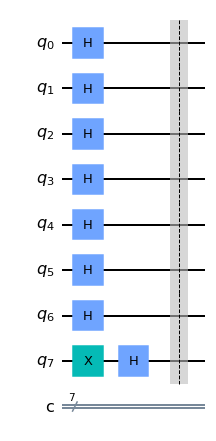

In [4]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()
circuit.draw()

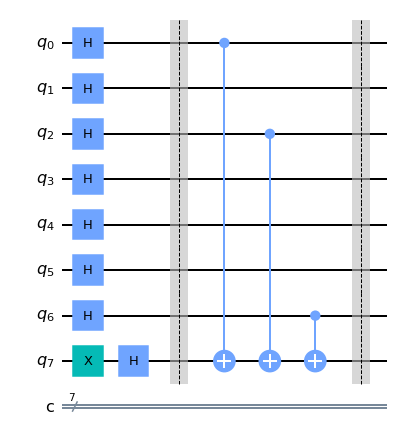

In [5]:
for index, one in enumerate(reversed(secretNumber)):
    if one == "1":
        circuit.cx(index, len(secretNumber))

circuit.barrier()

circuit.draw()

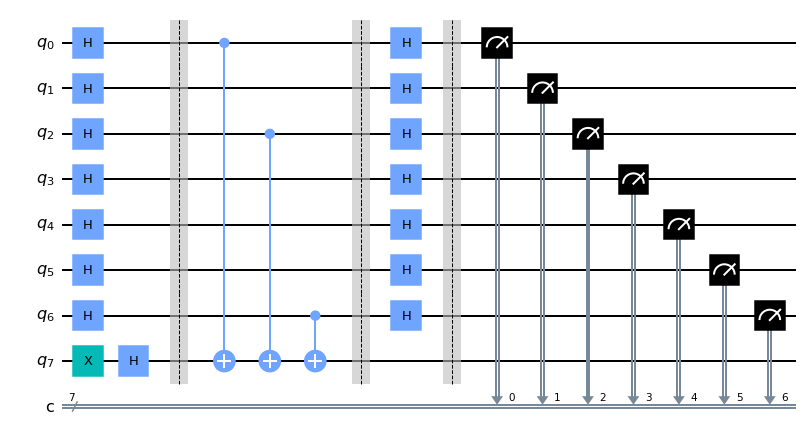

In [6]:
circuit.h(range(len(secretNumber)))

circuit.barrier()

circuit.measure(range(len(secretNumber)), range(len(secretNumber)))

circuit.draw()

In [7]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1000101': 1}
